<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.286423,42.614035,79.316648,-0.016800,173.200305,173.216592,-0.016287
1,0.0,1.0,91.648109,28.373156,82.812707,0.007819,212.841791,212.834025,0.007766
2,0.0,2.0,93.104187,99.366715,26.504452,-0.002613,228.972741,228.976848,-0.004107
3,0.0,3.0,99.084799,69.130559,76.191504,-0.004084,254.402778,254.407363,-0.004585
4,0.0,4.0,23.812794,91.011586,28.670841,0.002867,153.498088,153.495657,0.002431
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.149234,78.344687,40.918650,0.006784,163.419356,163.413025,0.006332
249996,999.0,246.0,76.846310,91.504788,43.974371,-0.004335,222.321135,222.328069,-0.006934
249997,999.0,247.0,28.432775,78.071553,55.665628,0.004902,172.174858,172.169765,0.005092
249998,999.0,248.0,28.727841,74.580190,50.751198,-0.001349,164.057880,164.058991,-0.001110


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.286423  42.614035  79.316648 -0.016800  173.200305   
      1.0    91.648109  28.373156  82.812707  0.007819  212.841791   
      2.0    93.104187  99.366715  26.504452 -0.002613  228.972741   
      3.0    99.084799  69.130559  76.191504 -0.004084  254.402778   
      4.0    23.812794  91.011586  28.670841  0.002867  153.498088   
...                ...        ...        ...       ...         ...   
999.0 245.0  34.149234  78.344687  40.918650  0.006784  163.419356   
      246.0  76.846310  91.504788  43.974371 -0.004335  222.321135   
      247.0  28.432775  78.071553  55.665628  0.004902  172.174858   
      248.0  28.727841  74.580190  50.751198 -0.001349  164.057880   
      249.0  56.680588  76.359389  99.257826  0.004213  242.302016   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.216592 -0.016287  
      1.0    212.834025  0.007766  
      2.0    228.976848 -0.004107  
      3.0    254.407363 -0.004585  
      4.0    153.495657  0.002431  
...                 ...       ...  
999.0 245.0  163.413025  0.006332  
      246.0  222.328069 -0.006934  
      247.0  172.169765  0.005092  
      248.0  164.058991 -0.001110  
      249.0  242.297218  0.004798  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.286423  42.614035  79.316648 -0.016800  173.200305   
      1.0    91.648109  28.373156  82.812707  0.007819  212.841791   
      2.0    93.104187  99.366715  26.504452 -0.002613  228.972741   
      3.0    99.084799  69.130559  76.191504 -0.004084  254.402778   
      4.0    23.812794  91.011586  28.670841  0.002867  153.498088   
...                ...        ...        ...       ...         ...   
999.0 245.0  34.149234  78.344687  40.918650  0.006784  163.419356   
      246.0  76.846310  91.504788  43.974371 -0.004335  222.321135   
      247.0  28.432775  78.071553  55.665628  0.004902  172.174858   
      248.0  28.727841  74.580190  50.751198 -0.001349  164.057880   
      249.0  56.680588  76.359389  99.257826  0.004213  242.302016   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.216592 -0.016287  
      1.0    212.834025  0.007766  
      2.0    228.976848 -0.004107  
      3.0    254.407363 -0.004585  
      4.0    153.495657  0.002431  
...                 ...       ...  
999.0 245.0  163.413025  0.006332  
      246.0  222.328069 -0.006934  
      247.0  172.169765  0.005092  
      248.0  164.058991 -0.001110  
      249.0  242.297218  0.004798  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.286423,42.614035,79.316648,-0.016800,173.200305,173.216592,-0.016287
1,0.0,1.0,91.648109,28.373156,82.812707,0.007819,212.841791,212.834025,0.007766
2,0.0,2.0,93.104187,99.366715,26.504452,-0.002613,228.972741,228.976848,-0.004107
3,0.0,3.0,99.084799,69.130559,76.191504,-0.004084,254.402778,254.407363,-0.004585
4,0.0,4.0,23.812794,91.011586,28.670841,0.002867,153.498088,153.495657,0.002431
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.149234,78.344687,40.918650,0.006784,163.419356,163.413025,0.006332
249996,999.0,246.0,76.846310,91.504788,43.974371,-0.004335,222.321135,222.328069,-0.006934
249997,999.0,247.0,28.432775,78.071553,55.665628,0.004902,172.174858,172.169765,0.005092
249998,999.0,248.0,28.727841,74.580190,50.751198,-0.001349,164.057880,164.058991,-0.001110


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.286423  42.614035  79.316648 -0.016800  173.200305   
      1.0    91.648109  28.373156  82.812707  0.007819  212.841791   
      2.0    93.104187  99.366715  26.504452 -0.002613  228.972741   
      3.0    99.084799  69.130559  76.191504 -0.004084  254.402778   
      4.0    23.812794  91.011586  28.670841  0.002867  153.498088   
...                ...        ...        ...       ...         ...   
999.0 245.0  34.149234  78.344687  40.918650  0.006784  163.419356   
      246.0  76.846310  91.504788  43.974371 -0.004335  222.321135   
      247.0  28.432775  78.071553  55.665628  0.004902  172.174858   
      248.0  28.727841  74.580190  50.751198 -0.001349  164.057880   
      249.0  56.680588  76.359389  99.257826  0.004213  242.302016   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.216592 -0.016287  
      1.0    212.834025  0.007766  
      2.0    228.976848 -0.004107  
      3.0    254.407363 -0.004585  
      4.0    153.495657  0.002431  
...                 ...       ...  
999.0 245.0  163.413025  0.006332  
      246.0  222.328069 -0.006934  
      247.0  172.169765  0.005092  
      248.0  164.058991 -0.001110  
      249.0  242.297218  0.004798  

[250000 rows x 7 columns]

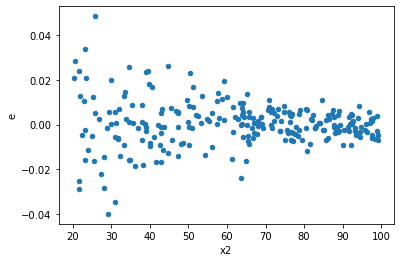

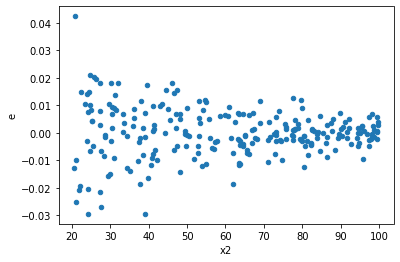

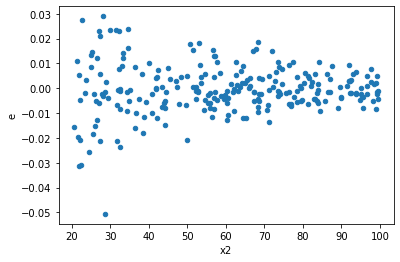

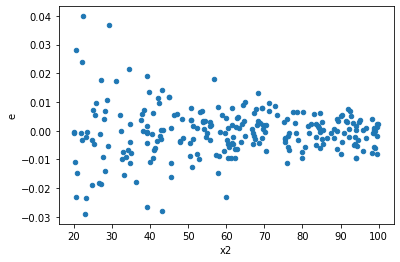

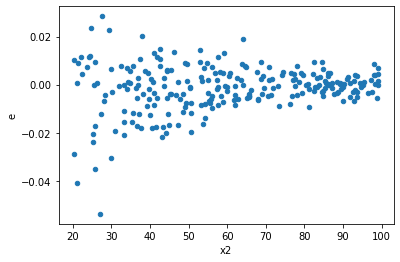

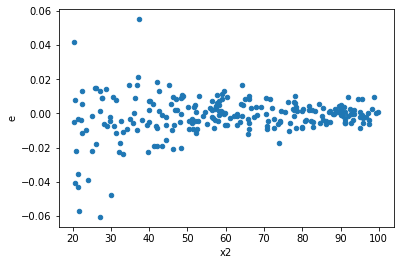

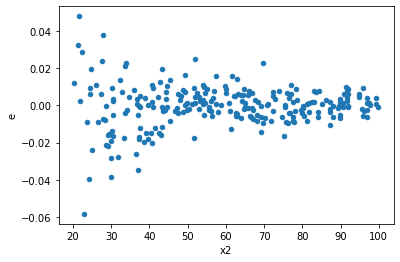

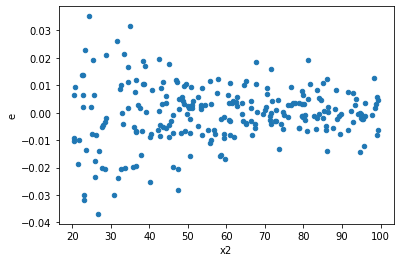

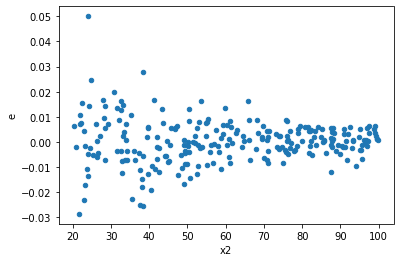

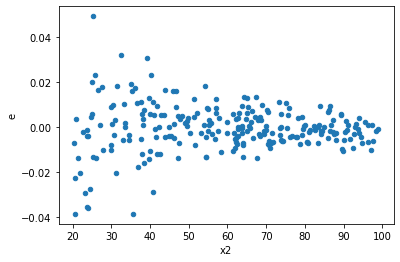

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,129.0,115.0,0.0116651526454958,0.012428313599777075,9.042753988756435e-05,0.00010807229217197457,1.195125868804452,0.32955606666935644,0.8352219666653218,0.16477803333467822,Reject005=1 : Homoscedasticity
5.0,124.0,120.0,0.010690021320748803,0.01638762872525542,8.620984936087745e-05,0.00013656357271046182,1.5840831844955665,0.011742589076480625,0.9941287054617597,0.0058712945382403126,Reject005=0 : Heteroscedasticity
6.0,107.0,137.0,0.00830337566235162,0.020712038198704947,7.760164170422074e-05,0.00015118276057448867,1.9481902348241926,0.0002411762535146078,0.9998794118732427,0.0001205881267573039,Reject005=0 : Heteroscedasticity
7.0,145.0,99.0,0.0048577883107606135,0.019120941970327293,3.3501988350073194e-05,0.00019314082798310397,5.765055672663739,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,127.0,117.0,0.013060237623954009,0.015414174349866801,0.00010283651672404731,0.00013174507991339148,1.28111184733063,0.17456755598309548,0.9127162220084523,0.08728377799154774,Reject005=1 : Homoscedasticity
10.0,127.0,117.0,0.010328089697566547,0.016056633608136757,8.132354092572084e-05,0.00013723618468492954,1.6875333159715475,0.004332873735213738,0.9978335631323931,0.002166436867606869,Reject005=0 : Heteroscedasticity
14.0,127.0,117.0,0.008908041161170124,0.013714242023255952,7.014205638716633e-05,0.00011721574378851241,1.6711192945571953,0.005105985361281373,0.9974470073193593,0.0025529926806406866,Reject005=0 : Heteroscedasticity
21.0,115.0,129.0,0.004133181979364553,0.026632812374772604,3.5940712864039586e-05,0.00020645590988195816,5.744346548243545,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
25.0,111.0,133.0,0.01397177075719072,0.02908876526828364,0.0001258718086233398,0.00021871252081416271,1.7375814585189642,0.002334174813682921,0.9988329125931585,0.0011670874068414605,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,129.0,115.0,0.0116651526454958,0.012428313599777075,9.042753988756435e-05,0.00010807229217197457,1.195125868804452,0.32955606666935644,Reject005=1 : Homoscedasticity
1.0,127.0,117.0,0.0186960803861675,0.008290145985120638,0.00014721323138714568,7.085594859077468e-05,0.4813150823680762,6.197256383994078e-05,Reject005=0 : Heteroscedasticity
2.0,111.0,133.0,0.013923820185790256,0.01196679910286955,0.00012543982149360592,8.997593310428234e-05,0.7172836507015334,0.07102880789794377,Reject005=1 : Homoscedasticity
3.0,113.0,131.0,0.017996611807186272,0.00809179438527228,0.00015926205139102896,6.176942278833801e-05,0.3878477154402484,4.3418681156706587e-07,Reject005=0 : Heteroscedasticity
4.0,110.0,134.0,0.01792254086614113,0.005245011421798863,0.0001629321896921921,3.914187628208107e-05,0.24023415112769944,1.7601336575695452e-13,Reject005=0 : Heteroscedasticity
5.0,124.0,120.0,0.010690021320748803,0.01638762872525542,8.620984936087745e-05,0.00013656357271046182,1.5840831844955665,0.011742589076480625,Reject005=0 : Heteroscedasticity
6.0,107.0,137.0,0.00830337566235162,0.020712038198704947,7.760164170422074e-05,0.00015118276057448867,1.9481902348241926,0.0002411762535146078,Reject005=0 : Heteroscedasticity
7.0,145.0,99.0,0.0048577883107606135,0.019120941970327293,3.3501988350073194e-05,0.00019314082798310397,5.765055672663739,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,127.0,117.0,0.013060237623954009,0.015414174349866801,0.00010283651672404731,0.00013174507991339148,1.28111184733063,0.17456755598309548,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    636
Reject005=1 : Homoscedasticity      364
Name: Result_test, dtype: int64